In [263]:
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D
import pandas as pd
import numpy as np
import librosa

data = pd.read_csv('../audioData.csv')
data

,feature,class
0,[-6.6391638e+02 7.4633250e+00 -6.2418396e+01 ...,beeBird
1,[-5.16368103e+02 2.06674080e+01 -1.56551895e+...,beeBird
2,[-469.1672 9.647738 -137.6997 -1...,beeBird
3,[-6.3586462e+02 1.5384795e+01 -1.6060805e+02 ...,beeBird
4,[-5.0093127e+02 8.0044546e+00 -1.5133850e+02 ...,beeBird
...,...,...
2148,[-3.32472534e+02 1.16614426e+02 4.51772957e+...,pigeon
2149,[-262.14792 83.66872 14.975486 5...,pigeon
2150,[-284.36514 132.5125 42.36633 5...,pigeon
2151,[-282.64023 99.18566 29.451946 5...,pigeon


In [261]:
#ses sinyallerinin özniteliklerini çıkarmak için splitAudioData.pynb dosyasında librosa kütüphanesini kullanmıştık
#burada rastegele 10 tane ses verisi alacağız ve bunları CNN algoritması kullanarak test edeceğiz


def features_extractor(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [180]:

import re
newX = []
for j in range(0, len(data['feature'])):
    #print(j, data['feature'][j], )
    newP = []
    for i in data['feature'][j].replace('\n', '').split(' '):
        if i != '':
            try:
                #print(float( re.sub("[^\d\.]", "", i)))
                newP.append(float( re.sub("[^\d\.]", "", i)))
            except:
                print(j, 'isnt ok.')
                continue
    
    print(j, 'is ok.')
    newX.append(newP)

0 is ok.
1 is ok.
2 is ok.
3 is ok.
4 is ok.
5 is ok.
6 isnt ok.
6 is ok.
7 is ok.
8 is ok.
9 isnt ok.
9 is ok.
10 is ok.
11 is ok.
12 is ok.
13 is ok.
14 is ok.
15 is ok.
16 is ok.
17 is ok.
18 is ok.
19 is ok.
20 is ok.
21 is ok.
22 is ok.
23 is ok.
24 is ok.
25 is ok.
26 is ok.
27 is ok.
28 is ok.
29 is ok.
30 is ok.
31 is ok.
32 is ok.
33 is ok.
34 is ok.
35 is ok.
36 is ok.
37 isnt ok.
37 is ok.
38 is ok.
39 is ok.
40 is ok.
41 is ok.
42 is ok.
43 isnt ok.
43 is ok.
44 is ok.
45 isnt ok.
45 is ok.
46 is ok.
47 isnt ok.
47 is ok.
48 is ok.
49 isnt ok.
49 is ok.
50 is ok.
51 is ok.
52 isnt ok.
52 is ok.
53 is ok.
54 isnt ok.
54 is ok.
55 is ok.
56 is ok.
57 is ok.
58 is ok.
59 is ok.
60 is ok.
61 is ok.
62 isnt ok.
62 is ok.
63 is ok.
64 is ok.
65 is ok.
66 is ok.
67 is ok.
68 is ok.
69 is ok.
70 isnt ok.
70 is ok.
71 is ok.
72 isnt ok.
72 is ok.
73 is ok.
74 is ok.
75 is ok.
76 is ok.
77 is ok.
78 isnt ok.
78 is ok.
79 is ok.
80 is ok.
81 is ok.
82 is ok.
83 is ok.
84 is ok.
85 is 

In [181]:
newX = np.array(newX)
newX.shape

(2153, 40)

In [182]:
y=np.array(data['class'].tolist())
y.shape

(2153,)

In [183]:
label = data.iloc[:,-1:].values
print(label.shape)

(2153, 1)


In [233]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(newX, label, test_size = 0.1, random_state=0)
print(x_train)

[[1131.371         0.            0.         ...    0.
     0.            0.        ]
 [   3.9457715     1.9691828     2.2674519  ...    9.1875863
     2.2487369     2.5723884 ]
 [   4.2966873     1.615567      5.2467678  ...    1.3918843
     1.2469023     9.1301709 ]
 ...
 [   3.8290622     1.5843319     4.7101246  ...    2.7335671
     4.2162771     8.5401163 ]
 [   3.84538452    1.98733768    1.7214695  ...    2.55926704
     1.93225288    1.33949471]
 [ 324.68045      75.1346        5.682959   ...    1.6817403
     4.638441      1.2186102 ]]


In [234]:
#input_dim = features, units= yapay sinir hücresi, init=yapay sinir hücresi içerisindeki ağırlıkları rastgele yerine belirli algoritmaya göre verir
# BinaryCrossentropy: Gerçek etiketler ile tahmin edilen etiketler arasındaki çapraz entropi kaybını hesaplar.

label.shape

(2153, 1)

In [245]:
model = Sequential()

# 1. Katman - Input
model.add(Dense(40,input_dim=40,kernel_initializer='uniform',activation='relu')) 

# 2. Katman 
model.add(Dense(36,kernel_initializer='uniform',activation='relu'))

# 3. Katman
model.add(Dense(20,kernel_initializer='uniform',activation='sigmoid'))

# 4. Katman - Output
model.add(Dense(9,kernel_initializer='uniform',activation='sigmoid')) 

In [246]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [247]:
# 'Cast string to float is not supported' hatası
# https://www.youtube.com/watch?v=k_VAKyzggJI

In [248]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
lb = LabelEncoder()
y = lb.fit_transform(y_train)

labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

y.shape


(1937, 9)

In [249]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [250]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_94 (Dense)            (None, 40)                1640      
                                                                 
 dense_95 (Dense)            (None, 36)                1476      
                                                                 
 dense_96 (Dense)            (None, 20)                740       
                                                                 
 dense_97 (Dense)            (None, 9)                 189       
                                                                 
Total params: 4,045
Trainable params: 4,045
Non-trainable params: 0
_________________________________________________________________


In [251]:
# epochs = ağırlıkları yeniden düzenleyerek çözüme en yakın değeri buluncaya kadar yapılacak deneme sayısı
# batch_size = tek seferde alınacak veri sayısı
# verbose = hatanın gösterilmemesi
# validation_split = doğrulama için eğitim verilerinin bir kısmını otomatik olarak ayırmaya izin verir.

In [252]:
history = model.fit(x_train, y, validation_split=0.33 ,batch_size=12, epochs=300, verbose=1)

Epoch 1/300
109/109 [==============================] - 1s 3ms/step - loss: 0.4454 - accuracy: 0.2544 - val_loss: 0.3192 - val_accuracy: 0.3516
Epoch 2/300
109/109 [==============================] - 0s 2ms/step - loss: 0.3085 - accuracy: 0.3300 - val_loss: 0.2904 - val_accuracy: 0.3516
Epoch 3/300
109/109 [==============================] - 0s 2ms/step - loss: 0.2968 - accuracy: 0.3300 - val_loss: 0.2851 - val_accuracy: 0.3516
Epoch 4/300
109/109 [==============================] - 0s 2ms/step - loss: 0.2947 - accuracy: 0.3300 - val_loss: 0.2830 - val_accuracy: 0.3516
Epoch 5/300
109/109 [==============================] - 0s 2ms/step - loss: 0.2939 - accuracy: 0.3300 - val_loss: 0.2824 - val_accuracy: 0.3516
Epoch 6/300
109/109 [==============================] - 0s 2ms/step - loss: 0.2936 - accuracy: 0.3300 - val_loss: 0.2821 - val_accuracy: 0.3516
Epoch 7/300
109/109 [==============================] - 0s 2ms/step - loss: 0.2936 - accuracy: 0.3300 - val_loss: 0.2815 - val_accuracy: 0.3516

In [253]:
score = model.evaluate(x_train,y)
score

61/61 [==============================] - 0s 1ms/step - loss: 0.0981 - accuracy: 0.8813


[0.09805108606815338, 0.8812596797943115]

In [254]:
validation_test_set_accuracy=model.evaluate(x_train, y, verbose=0)
print(validation_test_set_accuracy[1])

0.8812596797943115


In [255]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


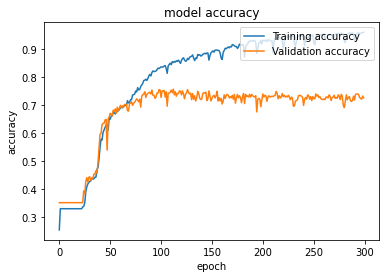

In [256]:
# accuracy history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training accuracy', 'Validation accuracy'], loc='upper right')
plt.show()

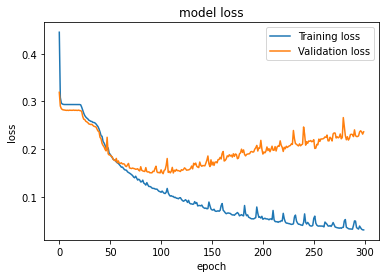

In [257]:
# loss history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training loss', 'Validation loss'], loc='upper right')
plt.show()

Text(0, 0.5, 'loss')

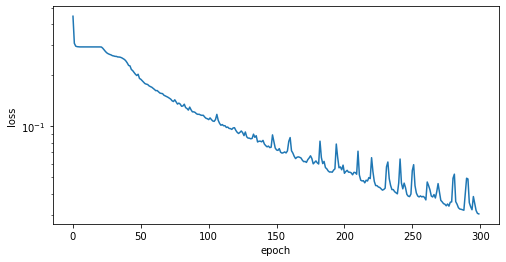

In [258]:
plt.figure(figsize=(8,4))
plt.semilogy(history.history['loss'])
plt.xlabel('epoch'); plt.ylabel('loss')

In [271]:
fileName = "../testData/beeBird18.wav"

In [272]:
testDataResult = features_extractor(fileName)

In [273]:
testDataResult=testDataResult.reshape(1, -1)
testDataResult.shape

(1, 40)

In [274]:
result_array=model.predict(testDataResult)
result_array

array([[3.8400581e-06, 2.4130940e-04, 1.1337877e-05, 6.3270330e-04,
        2.1685064e-03, 9.1248751e-04, 1.5927917e-08, 4.8865499e-12,
        9.9861002e-01]], dtype=float32)

In [275]:
resultClasses=["beeBird", "eagle", "hawk", "hoopoe", "hummingBird", "littleOwl", "nightingale", "parrot", "pigeon"]
resultClasses

['beeBird',
 'eagle',
 'hawk',
 'hoopoe',
 'hummingBird',
 'littleOwl',
 'nightingale',
 'parrot',
 'pigeon']

In [276]:
result=np.argmax(result_array[0])
result

8

In [277]:
from IPython.display import Audio
Audio(fileName)

In [278]:
resultClasses[result]

'pigeon'

In [281]:
y_pred=model.predict(x_test)

In [286]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets